In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X_data = torch.Tensor([[1.0],[2.0],[3.0]]) #我寫成了[1,0] ->多了一維 ,現在的3x1,外面多加一個括號是變成了tensor
Y_data = torch.Tensor([[0],[0],[1]]) # 0類-> x<3 ,其他 1類

In [ ]:
class LogisticRegressionModel(nn.Module): #這裡是最費工之處,約花了1~2小時才debug完成
  def _init_(self):
    super(LogisticRegressionModel,self)._init_()

  def forward(self,x):
    self.linear = nn.Linear(1,1) #一定給放這,不然會出錯(原本是放在init底下)
    #y_pred = nn.Sigmoid(self.linear(x)) #以前是nn.functional as F , F.sigmoid
    y_pred = torch.sigmoid(self.linear(x))#上面的sigmoid會出錯
    return y_pred

model = LogisticRegressionModel()


In [ ]:
model(X_data) #注意看,輸出只會在0~1間,這裡是我多加來這次model是否能順利執行

tensor([[0.4154],
        [0.4592],
        [0.5036]], grad_fn=<SigmoidBackward0>)

In [ ]:
criterion = torch.nn.BCELoss(reduction='mean')#size_average已經改成reduction='mean'(更新後) # bce = binary cross entropy
optimizer = torch.optim.SGD(model.parameters(),lr=0.0000000000000000000001) #放入model參數,這裡一開始model的參數一直為0,所以把model的定義調整多遍才成功

In [ ]:
lossRecord = []#用來記錄誤差

In [ ]:
for epoch in range(1000):
  y_pred = model(X_data) #丟資料進去
  loss = criterion(y_pred,Y_data) #只有data在0~1才能使用,因為誤差法是這樣設計的 #判斷和標籤有差多少
  lossRecord.append(loss.item())
  print(epoch,loss.item()) #打印這次epoch和其loss

  optimizer.zero_grad()#梯度清空,方便下一個梯度使用
  loss.backward() #開始計算
  optimizer.step() #優化

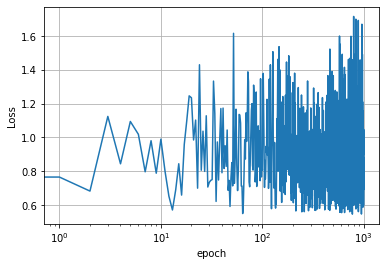

In [ ]:
x = np.linspace(0,1000,1000) #0~1000 切1000份
plt.plot(x,lossRecord) #當我把學習率調到超小,圖的左邊比較明顯,至少不會像右邊那樣
plt.xlabel('epoch')
plt.xscale('log') #x的展現方式用log,不然會這次的數據會砸成一團
plt.ylabel('Loss')
plt.grid()
plt.show()

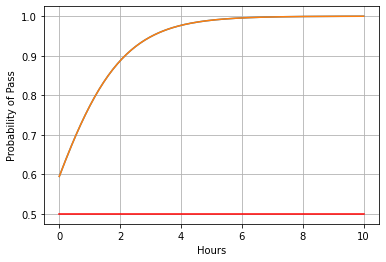

In [ ]:

x = np.linspace(0,10,200)
x_t = torch.Tensor(x).view((200,1))
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x,y)
plt.plot(x,y)
plt.plot([0,10],[0.5,0.5],c='r') #紅色,x0~10 y0.5
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()

In [ ]:
xx = torch.tensor([3.0])
model(xx) ##試用看看,小於0.5表示class0 其他則是1,每次都不一樣

tensor([0.3540], grad_fn=<SigmoidBackward0>)